In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np

In [5]:
start_lat = -44; end_lat = -10; start_lon = 130; end_lon = 156
m = Basemap(llcrnrlon = start_lon, llcrnrlat = start_lat, urcrnrlon = end_lon, \
    urcrnrlat = end_lat, projection="cyl", resolution = "l")

In [16]:
dcp = xr.open_dataset("/g/data/eg3/ab4502/ExtremeWind/aus/threshold_data/barpa_access_dcp_6hr_daily_max_mean.nc")["dcp"]
scp = xr.open_dataset("/g/data/eg3/ab4502/ExtremeWind/aus/threshold_data/barpa_access_scp_fixed_6hr_daily_max_mean.nc")["scp_fixed"]
stp = xr.open_dataset("/g/data/eg3/ab4502/ExtremeWind/aus/threshold_data/barpa_access_stp_fixed_left_6hr_mean.nc")["stp_fixed_left"]
mlcape = xr.open_dataset("/g/data/eg3/ab4502/ExtremeWind/aus/threshold_data/barpa_access_ml_cape_6hr_daily_max_mean.nc")["ml_cape"]
mucape = xr.open_dataset("/g/data/eg3/ab4502/ExtremeWind/aus/threshold_data/barpa_access_mu_cape_6hr_daily_max_mean.nc")["mu_cape"]
mlcs6 = xr.open_dataset("/g/data/eg3/ab4502/ExtremeWind/aus/threshold_data/barpa_access_mlcape*s06_6hr_daily_max_mean.nc")["mlcape*s06"]
mucs6 = xr.open_dataset("/g/data/eg3/ab4502/ExtremeWind/aus/threshold_data/barpa_access_mucape*s06_6hr_daily_max_mean.nc")["mucape*s06"]

In [19]:
dcp_hist = dcp.sel({"time":(dcp["time.year"]<=2009) & (dcp["time.year"]>=1980)}).mean("time")
scp_hist = scp.sel({"time":(scp["time.year"]<=2009) & (scp["time.year"]>=1980)}).mean("time")
stp_hist = stp.sel({"time":(stp["time.year"]<=2009) & (stp["time.year"]>=1980)}).mean("time")
mlcape_hist = mlcape.sel({"time":(mlcape["time.year"]<=2009) & (mlcape["time.year"]>=1980)}).mean("time")
mucape_hist = mucape.sel({"time":(mucape["time.year"]<=2009) & (mucape["time.year"]>=1980)}).mean("time")
mlcs6_hist = mlcs6.sel({"time":(mlcs6["time.year"]<=2009) & (mlcs6["time.year"]>=1980)}).mean("time")
mucs6_hist = mucs6.sel({"time":(mucs6["time.year"]<=2009) & (mucs6["time.year"]>=1980)}).mean("time")

dcp_scenario = dcp.sel({"time":(dcp["time.year"]<=2059) & (dcp["time.year"]>=2030)}).mean("time")
scp_scenario = scp.sel({"time":(dcp["time.year"]<=2059) & (scp["time.year"]>=2030)}).mean("time")
stp_scenario = stp.sel({"time":(stp["time.year"]<=2059) & (stp["time.year"]>=2030)}).mean("time")
mlcape_scenario = mlcape.sel({"time":(mlcape["time.year"]<=2059) & (mlcape["time.year"]>=2030)}).mean("time")
mucape_scenario = mucape.sel({"time":(mucape["time.year"]<=2059) & (mucape["time.year"]>=2030)}).mean("time")
mlcs6_scenario = mlcs6.sel({"time":(mlcs6["time.year"]<=2059) & (mlcs6["time.year"]>=2030)}).mean("time")
mucs6_scenario = mucs6.sel({"time":(mucs6["time.year"]<=2059) & (mucs6["time.year"]>=2030)}).mean("time")

In [20]:
topog = xr.open_dataset("/g/data/du7/barpa/trials/BARPA-EASTAUS_12km/static/topog-BARPA-EASTAUS_12km.nc")["topog"].interp({"latitude":dcp_hist.lat, "longitude":dcp_hist.lon}, "nearest")
lsm_barp = ((topog.values) > 0) * 1

/g/data/eg3/ab4502/miniconda3/envs/wrfpython3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


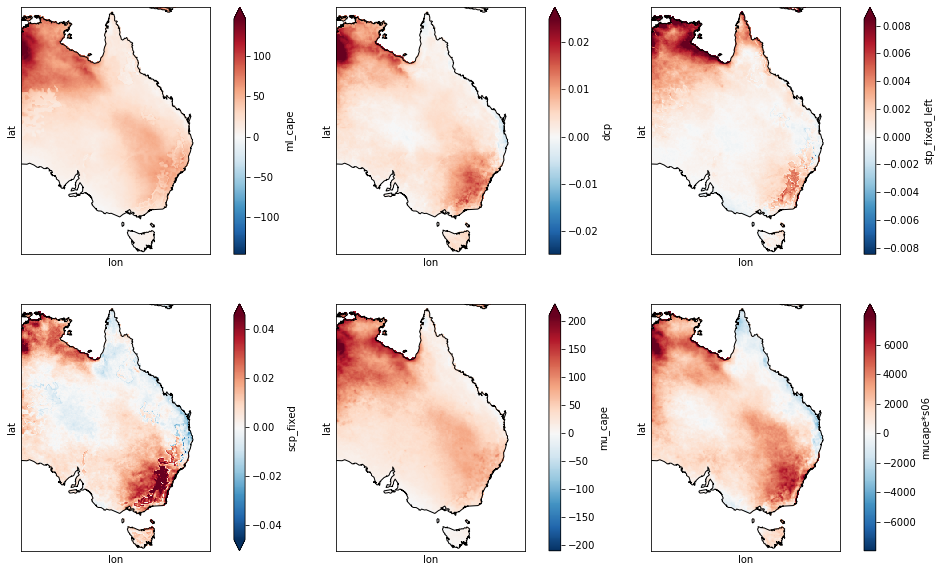

In [31]:
plt.figure(figsize=[16,10])
plt.subplot(2,3,4)
xr.where(lsm_barp==1, (scp_scenario - scp_hist),np.nan).plot(robust=True)
m.drawcoastlines()
plt.subplot(2,3,3)
xr.where(lsm_barp==1, (stp_scenario - stp_hist),np.nan).plot(robust=True)
m.drawcoastlines()
plt.subplot(2,3,1)
xr.where(lsm_barp==1, (mlcape_scenario - mlcape_hist),np.nan).plot(robust=True)
m.drawcoastlines()
plt.subplot(2,3,5)
xr.where(lsm_barp==1, (mucape_scenario - mucape_hist),np.nan).plot(robust=True)
m.drawcoastlines()
plt.subplot(2,3,2)
xr.where(lsm_barp==1, (dcp_scenario - dcp_hist),np.nan).plot(robust=True)
m.drawcoastlines()
plt.subplot(2,3,6)
xr.where(lsm_barp==1, (mucs6_scenario - mucs6_hist),np.nan).plot(robust=True)
m.drawcoastlines()

plt.savefig("/g/data/eg3/ab4502/figs/barpa_change_2050.png")

In [7]:
mlcape

<xarray.DataArray 'ml_cape' (time: 1680, lat: 314, lon: 267)>
[140847840 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 1960-01-01 1960-02-01 ... 2099-12-01
  * lat      (lat) float32 -44.475 -44.365 -44.255 ... -10.154999 -10.045002
  * lon      (lon) float32 126.945 127.055 127.165 ... 155.985 156.095 156.205
Attributes:
    steps:    [124 116 124 ... 124 120 124]